# Wavelets

This page serves as a reference for the different types of wavelets baked into the examples module and provides a recipe for creating your own.

**TODO**:
- Add description of wavelet
- Describe parameterisation
- Add default parameters and description
- Explain and describe defaults
- Note deprecated routines

| Parameter name | Symbol | Description |
|----------------|--------|-------------|
| Amplitude      | $A$    | Maximum displacement from zero |
| Peak frequency | $f$    | The dominant frequency of the wave |
| Center         | $t_0$  | The $t$ value where the wave attains its maximum displacement |



In [19]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from IPython.display import display

import examples.seismic.source as s

In [3]:
def plot_wavelet(t, data, envelope=None):
    N = t.size
    T = t[-1]
    
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)
    fig.tight_layout()
    
    ax[0].plot(t, data)
    if envelope is not None:
        ax[0].plot(t, envelope, 'k--')
    ax[0].set_xlim(0, 0.2)
    ax[0].set_ylim(-1.05, 1.05)
    ax[0].set_xlabel('Time t')
    ax[0].set_ylabel('Amplitude')
    ax[0].set_title('Wavelet')
    
    abcissa = sp.fft.fftfreq(N, T/N)
    ax[1].plot(abcissa[:N//2], (1/N)*np.abs(sp.fft.fft(data)[:N//2]))
    ax[1].set_xlim(0, 100)
    ax[1].set_ylim(0, None)
    ax[1].set_xlabel('Frequency f = 1/t')
    ax[1].set_ylabel('Amplitude')
    ax[1].set_title('Spectrum')

    fig.subplots_adjust(wspace=0.25)

    return fig, ax

In [4]:
f0 = 30
N = 1000
T = 20/f0
gamma = 3
t = np.linspace(0, T, 1001)

## The Gaussian soliton
The Gaussian function is not a wavelet and we make the distinction here by refering to it as a soliton.
Since the Fourier transform of a Gaussian is also a Gaussian we cannot change the peak frequency, the peak frequency is always zero.

To make the distinction clear we use the parameter $b$ in place of $f$ for describing the parameterisation.
$A$ and $t_0$ remain the same.

It takes the following parameter:

| Parameter name | Symbol | Description |
|----------------|--------|-------------|
| Width          | $b$    | Defines the width of the Gaussian |

The mathematical expression for a Gaussian can be written as:

In [5]:
s.gauss

A*exp(-b**2*(t - t_0)**2)

To ensure that the majority of the soliton appears in the resultant array, the default value of $t_0$ is chosen to be <maths> which corresponds to three standard deviations from the peak.
The user may change this value at construction time to move the peak either to the left or to the right.

Plotting the array we can see the bell shaped curve of the Gaussian soliton on the left and on the right we plot the frequency spectrum.
The spectrum also takes the form of a Gaussian, centred on zero.

0.011108996538242306


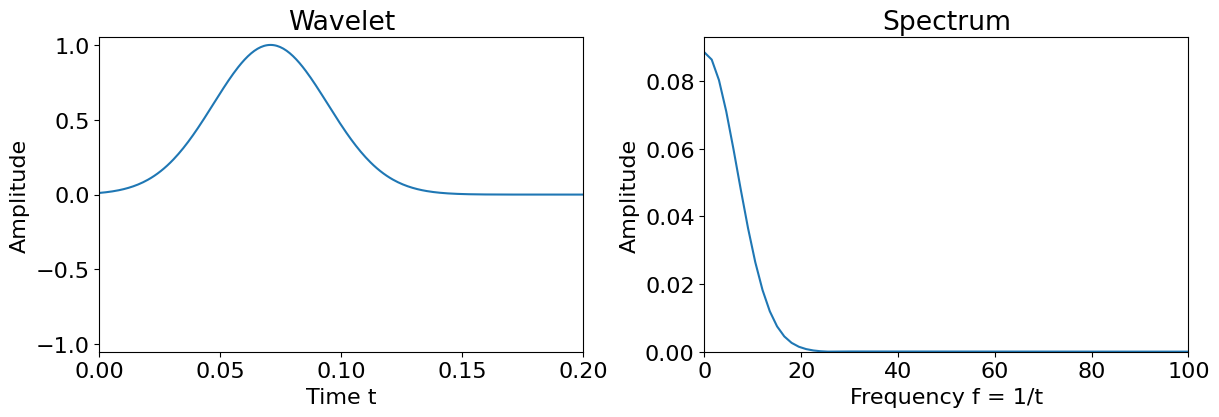

In [5]:
gauss_data = s.wavelet['gauss_soliton'](t, f0)
print(gauss_data[0])
_ = plot_wavelet(t, gauss_data)

## Gaussian derivative wavelet
The first family of wavelets that we look at is the derivatives of the Gaussian soliton.

It is the case that for any $n \in \mathbb{N}_{>0}$, $\frac{d^n}{dt^n} \Phi(t; A, b, t_0)$ is a wavelet.
Here $\Phi$ is the parameterised representation of the Gaussian soliton defined above.

The Gaussian derivatives wavelet (sometimes written DGauss) takes the three standard parameters $A, f, t_0$ as well as:

| Parameter name | Symbol | Description |
|----------------|--------|-------------|
| Derivative     | $n$    | Number of derivatives of $\Phi$ to take |

In order to have the wavelet attain its peak amplitude, each derivatives is scaled.
For $n=1,2$ this is done symbolically, and for $n>2$ the constant is computed numerically and represented in the expression with the symbol $C$

For $n=1,2,3,4$ we have

In [18]:
sympy.init_printing(use_latex='mathjax')
for n in range(1,5):
    print(f'{n = }')
    display(s.dgauss(n=n))
    print()

n = 1


                            2  2         2
                   1/2  -2⋅π ⋅f ⋅(t - t₀) 
-2⋅π⋅A⋅f⋅(t - t₀)⋅ℯ   ⋅ℯ                  


n = 2


                             2  2         2
  ⎛   2  2         2    ⎞  -π ⋅f ⋅(t - t₀) 
A⋅⎝2⋅π ⋅f ⋅(t - t₀)  - 1⎠⋅ℯ                


n = 3


                                                   2  2         2 
                                               -2⋅π ⋅f ⋅(t - t₀)  
                    ⎛     2  2         2    ⎞  ───────────────────
    4    4          ⎜  4⋅π ⋅f ⋅(t - t₀)     ⎟           3         
16⋅π ⋅A⋅f ⋅(t - t₀)⋅⎜- ───────────────── + 3⎟⋅ℯ                   
                    ⎝          3            ⎠                     
──────────────────────────────────────────────────────────────────
                               9⋅C                                


n = 4


                                                     2  2         2 
                                                   -π ⋅f ⋅(t - t₀)  
                                                   ─────────────────
 4    4 ⎛ 4  4         4      2  2         2    ⎞          2        
π ⋅A⋅f ⋅⎝π ⋅f ⋅(t - t₀)  - 6⋅π ⋅f ⋅(t - t₀)  + 3⎠⋅ℯ                 
────────────────────────────────────────────────────────────────────
                                 C                                  

We can also plot the wavelet and spectrum to show the form and verify that the peak frequency sits at 30 Hz in each case.

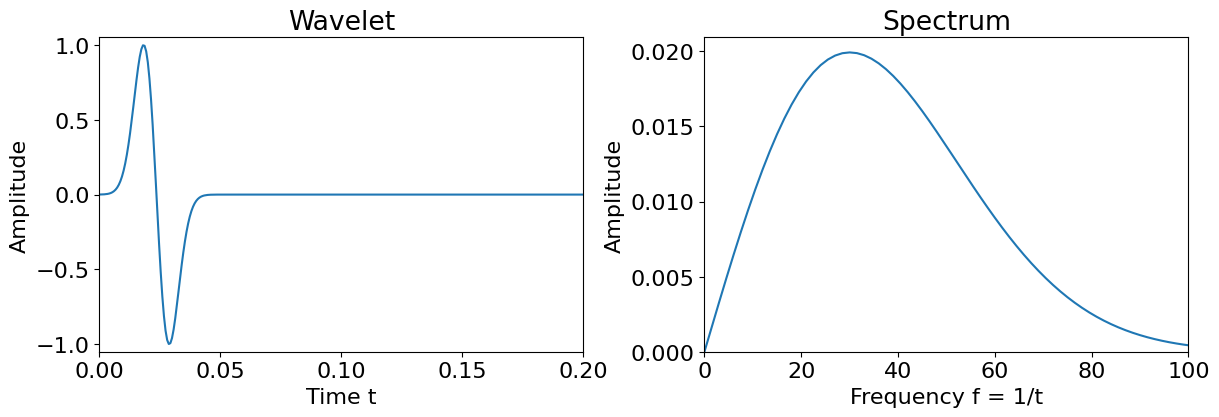

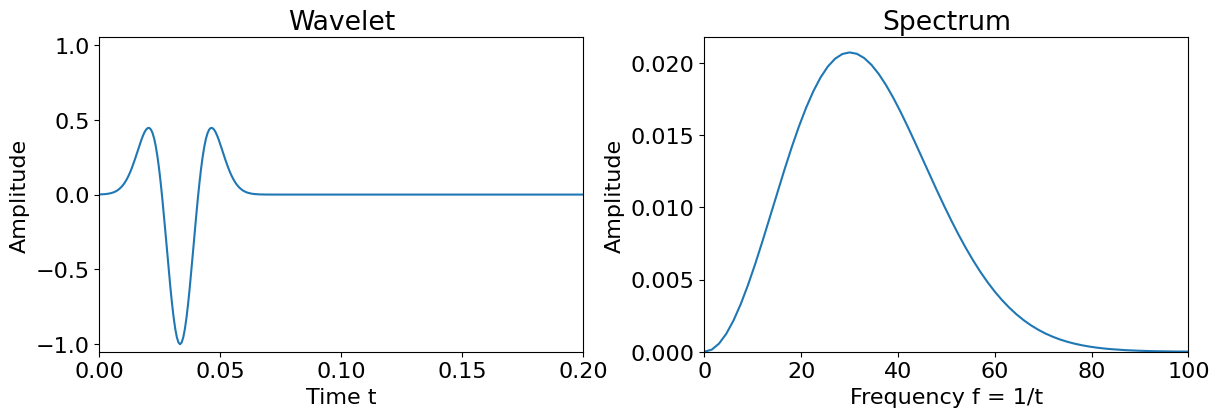

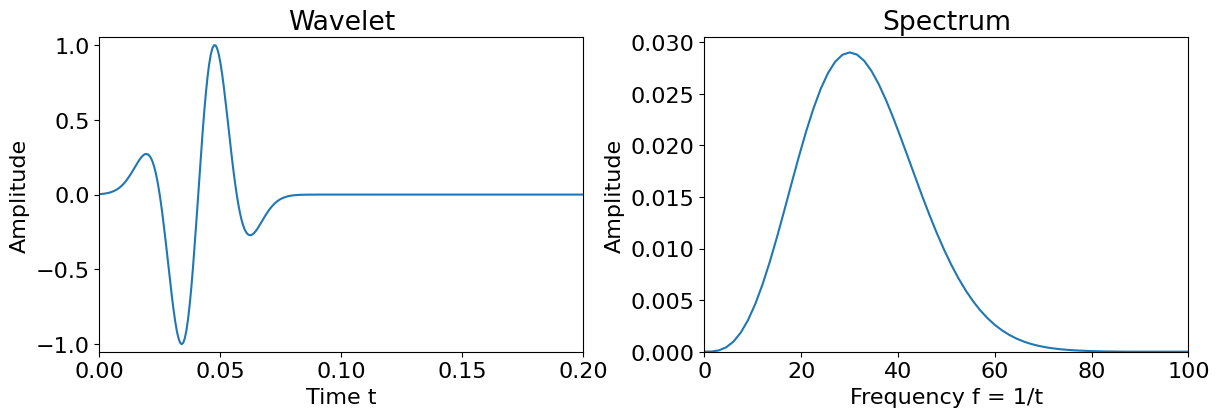

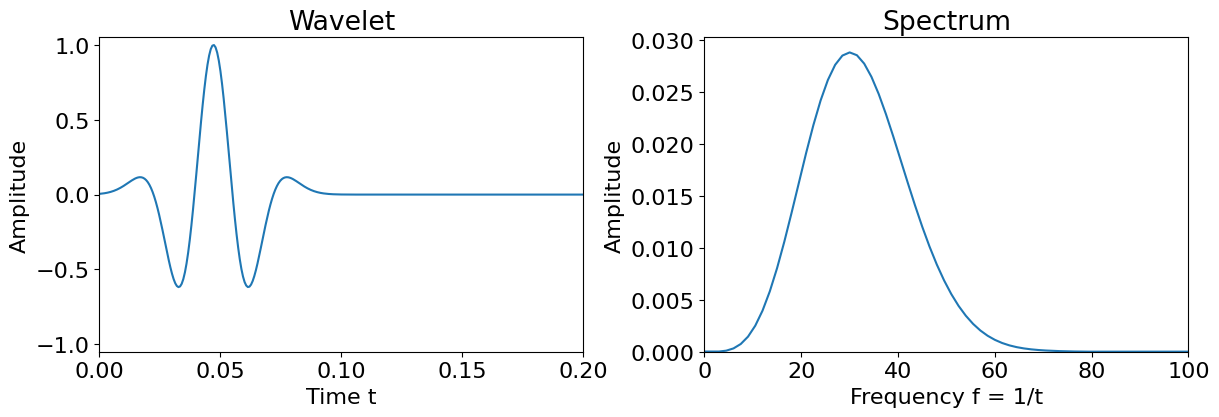

In [21]:
for n in range(1, 5):
    dgauss_data = s.wavelet['dgauss'](t, f0, A=1, n=n)
    _ = plot_wavelet(t, dgauss_data)

## The Ricker wavelet
The second derivative of a Gaussian may look familiar, that is because (when wit is more commonly referred to as the Ricker wavelet.
This is one of the most commonly used wavelets in seismic imaging.

It is parameterised by the three standard parameters $A, f, t_0$ and has the form:

In [8]:
s.ricker

-A*(2*pi**2*f**2*(t - t_0)**2 - 1)*exp(-pi**2*f**2*(t - t_0)**2)

We plot the Ricker wavelet and its spectrum:

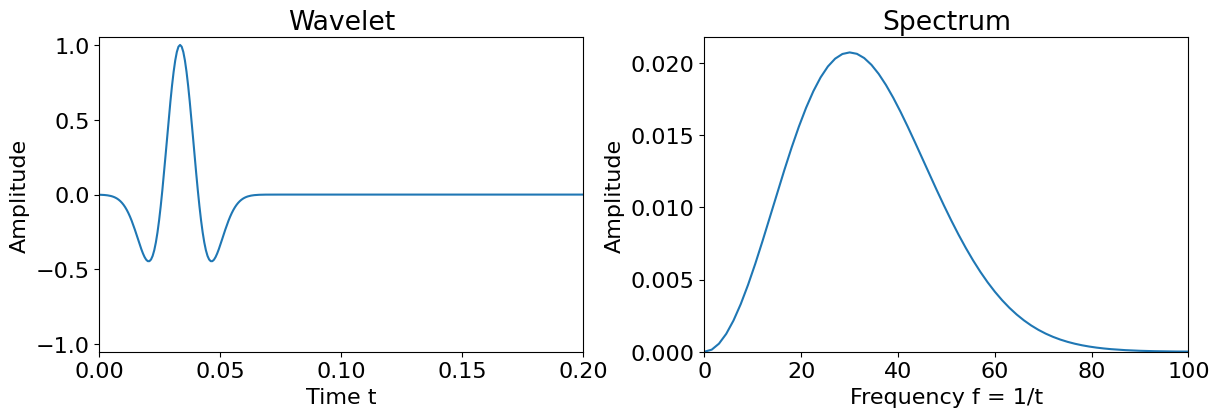

In [22]:
ricker_data = s.wavelet['ricker'](t, f0)
_ = plot_wavelet(t, ricker_data)

## The Gabor wavelet


| Parameter name | Symbol   | Description |
|----------------|----------|-------------|
| Gamma          | $\gamma$ | Number of peaks (approximately) |
| Phase shift    | $\phi$   | The offset applied to cosine |

The Gabor wavelet is defined to be (as per the SEG wiki):

In [11]:
s.gabor

A*exp(-pi**2*f**2*(t - t_0)**2/𝛾**2)*cos(2*pi*f*(t - t_0) + 𝜙)

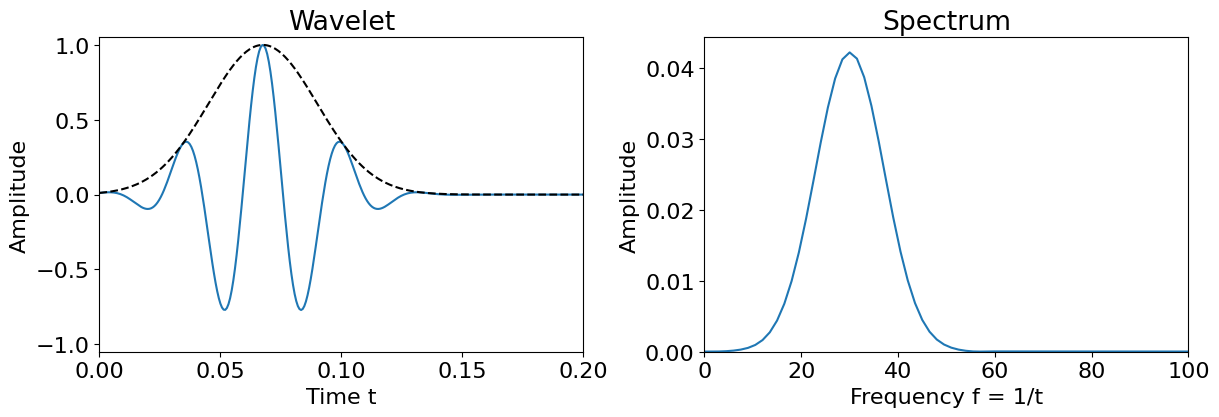

In [23]:
gabor_data = s.wavelet['gabor'](t, f0, 1, gamma=gamma)
envelope = s.wavelet['gauss_soliton'](t, f0*np.pi/gamma, 1)
_ = plot_wavelet(t, gabor_data, envelope)

Notice that the Gabor wavelet only attains its peak if there is zero phase shift.
Applying a quarter rotation phase shift maintains the peak freqency and takes the following form:

0.011108996538242316


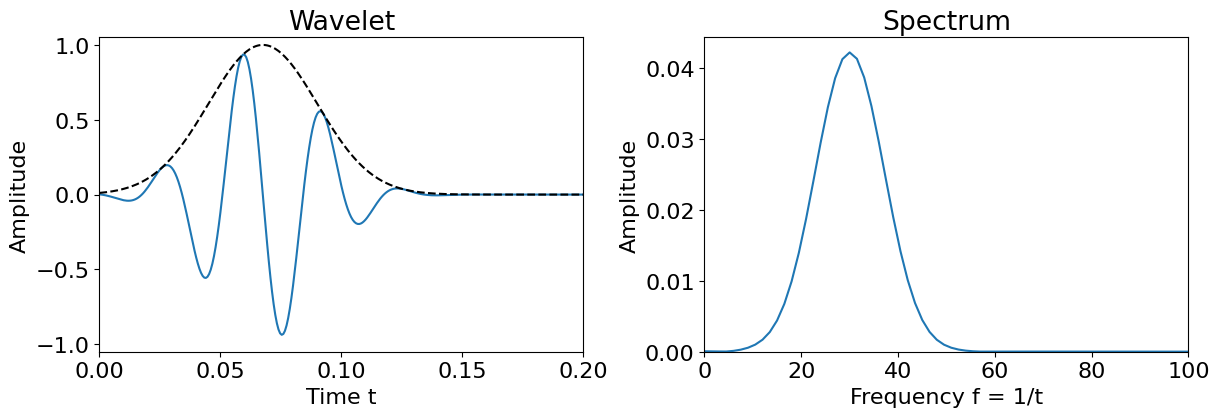

In [13]:
gabor_data = s.wavelet['gabor'](t, f0, 1, gamma=gamma, phi=np.pi/2)
envelope = s.wavelet['gauss_soliton'](t, f0*np.pi/gamma, 1)
_ = plot_wavelet(t, gabor_data, envelope)

## Custom wavelet

We can also create any custom wavelet that we like

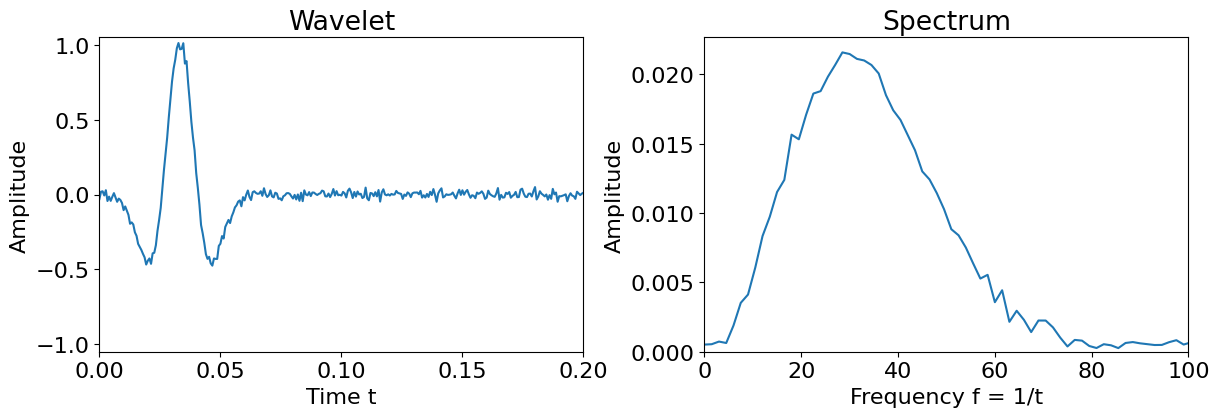

In [15]:
rng = np.random.default_rng(seed=7)
custom_data = s.wavelet['ricker'](t, f0) + np.random.normal(0, 0.02, t.shape)

_ = plot_wavelet(t, custom_data)

## Creating a wavelet source in Devito examples

If you are using the code in Devito's examples module, you can create any of the above wavelets by creating  `WaveletSource`

```python
def func():
    print('x')
```